# <font color=#f06969>Evaluation of Synthetic Data</font>

## PRISM dataset evaluation from synthetic data generated on 03/09/2020
<hr>

The following jupyter notebook evaluates the distribution, fidelity and usefulness of the synthetic data synthesised for the PRISM dataset.<br>
The evaluation methods included are:
#### 1. Distribution evaluation methods:
[1.1 Numerical variables distribution comparison](#hist_link)
<br>[1.2 Categorical variables distribution comparison](#cat_link)
<br>[1.3 Pearson's Correlation Coefficient comparison](#pearsons_link)

#### 2. Fidelity evaluation methods:
[2.1 tSNE and PCA plots comparison](#tSNE_PCA_link)
<br>[2.2 Discriminative model performance](#discrim_link)
<br>[2.3 Autocorrelation comparison](#auto_link)

#### 3. Usefulness evaluation methods:
[3.1 Predictive model performance comparison](#pred_link)
<br>[3.2 Next-step predictive model performance comparison](#tpred_link)

<hr>

# <font color=#0275D8>Importing Packages</font>

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score

from evaluation.helper_eval import *
from evaluation.distributions_eval import *
from evaluation.fidelity_eval import *
from evaluation.predictive_eval import *

<hr>

# <font color=#0275D8>Data Loading and Preparation </font>

In [2]:
# specify numerical columns
num_cols = ['ab_pain_dur', 'age', 'aneroxia_dur', 'plasmodium_density',
               'cough_dur', 'diarrhea_dur', 'fatigue_dur', 'fever_dur', 'headache_dur',
               'height', 'hemoglobin', 'joint_pain_dur', 'muscle_ache_dur', 'temp',
               'vomit_dur', 'weight', 'dday']

# specify categorical columns
cat_cols = ['complicated_malaria_no',
    'complicated_malaria_not_assessed', 'complicated_malaria_yes',
    'febrile_no', 'febrile_yes', 'ITN_no', 'ITN_not_applicable', 'ITN_yes',
    'malaria_no', 'malaria_yes',
    'malaria_parasite_blood_smear_indicated_but_not_done',
    'malaria_parasite_blood_smear_negative_/_lamp_negative',
    'malaria_parasite_blood_smear_negative_/_lamp_not_done',
    'malaria_parasite_blood_smear_negative_/_lamp_positive',
    'malaria_parasite_blood_smear_not_indicated',
    'malaria_parasite_blood_smear_positive_/_no_malaria',
    'malaria_parasite_symptomatic_malaria',
    'malaria_treatment_artmether-lumefantrine_for_uncomplicated_malaria',
    'malaria_treatment_no_malaria_medications_given',
    'malaria_treatment_quinine_for_uncomplicated_malaria_in_the_1st_trimester_of_pregnancy',
    'malaria_treatment_quinine_for_uncomplicated_malaria_within_14_days_of_a_previous_treatment_for_malaria',
    'malaria_treatment_quinine_or_artesunate_for_complicated_malaria',
    'plasmodium_gametocytes_no', 'plasmodium_gametocytes_yes',
    'plasmodium_lamp_negative', 'plasmodium_lamp_no_result',
    'plasmodium_lamp_positive', 'visit_type_enrollment',
    'visit_type_scheduled_visit', 'visit_type_unscheduled_visit']

In [3]:
# load in original and generated (intermediate) csv
ori = pd.read_csv('data/ori_prism_cleaned.csv')
gen = pd.read_csv('data/gen_prism_int_c1000.csv')

# get numerical and categorical columns for original and generated data
ori_num = get_numerical_columns_df(ori, num_cols)
gen_num = get_numerical_columns_df(gen, num_cols)
ori_cat = get_categorical_columns_df(ori, cat_cols)
gen_cat = get_categorical_columns_df(gen, cat_cols)

# turn dataframe into 3D np arrays (both cat and num data)
ori_3d = Stack2DSequence(ori) #shape (1347,130,48)
gen_3d = Stack2DSequence(gen) #shape (1347,130,48)

# turn dataframe into 3D np arrays of only numerical or categorical data
ori_3d_num = Stack2DSequence(get_numerical_columns_df(ori, num_cols, return_id=True))
gen_3d_num = Stack2DSequence(get_numerical_columns_df(gen, num_cols, return_id=True))
ori_3d_cat = Stack2DSequence(get_categorical_columns_df(ori, cat_cols, return_id=True))
gen_3d_cat = Stack2DSequence(get_categorical_columns_df(gen, cat_cols, return_id=True))

# load in original original and generated csv already with date time and same column names as original original
ori_auto = pd.read_csv("../../isaFull.tsv", '\t')
gen_auto = pd.read_csv('data/gen_prism_final_c1000.csv')
#remove <5 visits from original original data to match the generated data.
ori_auto_5above = ori_auto[ori_auto.groupby('Participant_Id')['Participant_Id'].transform('size') >= 5].reset_index(drop=True)

In [7]:
# load in original and generated (intermediate) csv
gen2 = pd.read_csv('data/gen_prism_int_e200.csv')

# get numerical and categorical columns for original and generated data
gen_num2 = get_numerical_columns_df(gen2, num_cols)
gen_cat2 = get_categorical_columns_df(gen2, cat_cols)

# turn dataframe into 3D np arrays (both cat and num data)
gen_3d2 = Stack2DSequence(gen2) #shape (1347,130,48)

# turn dataframe into 3D np arrays of only numerical or categorical data
gen_3d_num2 = Stack2DSequence(get_numerical_columns_df(gen2, num_cols, return_id=True))
gen_3d_cat2 = Stack2DSequence(get_categorical_columns_df(gen2, cat_cols, return_id=True))

# load in original original and generated csv already with date time and same column names as original original
gen_auto2 = pd.read_csv('data/gen_prism_final_c1000.csv')
#remove <5 visits from original original data to match the generated data.

In [8]:
# create a dictionary for the case where we want to loop through multiple sets of real and gen data
synthetic_data_dic = {'Dop_c1000':[ori, gen], 'Dop_e200':[ori, gen2]}
synthetic_num_dic = {'Dop_c1000':[ori_num, gen_num], 'Dop_e200':[ori_num, gen_num2]}
synthetic_cat_dic = {'Dop_c1000':[ori_cat, gen_cat], 'Dop_e200':[ori_cat, gen_cat2]}
synthetic_array_dic = {'Dop_c1000':[ori_3d, gen_3d], 'Dop_e200':[ori_3d, gen_3d2]}
synthetic_array_num_dic = {'Dop_c1000':[ori_3d_num, gen_3d_num], 'Dop_e200':[ori_3d_num, gen_3d_num2]}
synthetic_array_cat_dic = {'Dop_c1000':[ori_3d_cat, gen_3d_cat], 'Dop_e200':[ori_3d_cat, gen_3d_cat2]}
synthetic_auto_dic = {'Dop_c1000': [ori_auto_5above, gen_auto], 'Dop_e200':[ori_auto_5above, gen_auto2]}
syn_keys = list(synthetic_data_dic.keys())
n = len(syn_keys)

<hr>

# <font color=#0275D8> 1. Distribution evaluation</font>

<a id = "hist_link" Here ></a>

## <font color=#472F91> 1.1 Numerical variables distribution comparison </font>

### <u> Method description </u>

For numerical columns, histograms for the original dataset and the generated dataset are overlaid for each column, giving a visual perception of the similarity in diversity and distribution.
To quantify this, a Kolmogrov-Smirnov Test is performed with 100 randomly selected samples to avoid biasing the result towards rejecting the null hypothesis. The Kolmogrov-Smirnov Test is a non parametric hypothesis test where the null hypothesis is that two samples (one from the original and one from the synthetic) originate from the same distribution.
<br><b>The closer the Kolmogrov-Smirnov Test p-value is to 1, the higher the fidelity</b>

### <u> Results </u>

Overlays of original and generated histograms (probability density function) and corresponding cumulative distribution function for each column of the dataset.

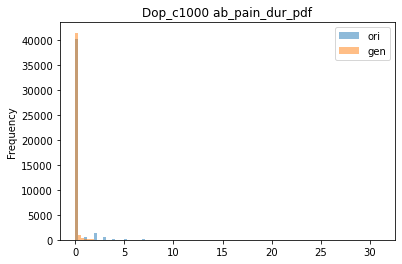

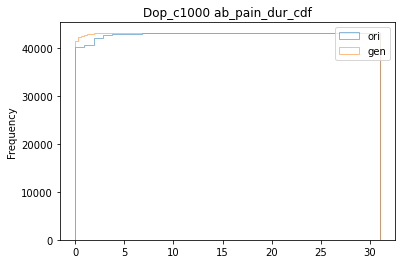

K-S test result: [0.286     0.0016933]


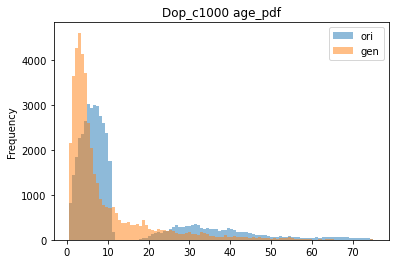

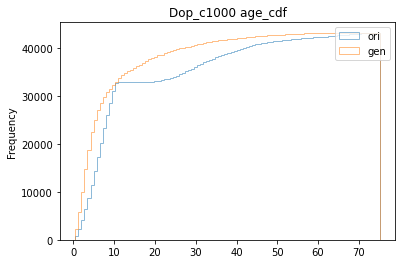

K-S test result: [0.28      0.0061161]


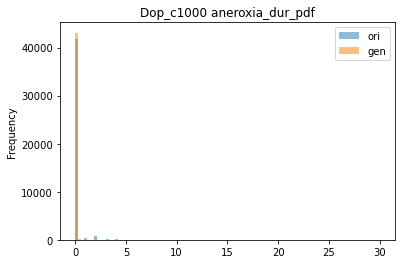

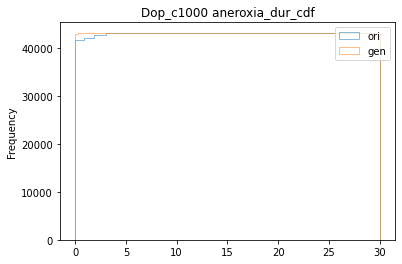

K-S test result: [6.13000000e-01 3.24115616e-16]


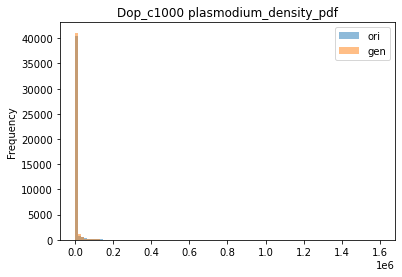

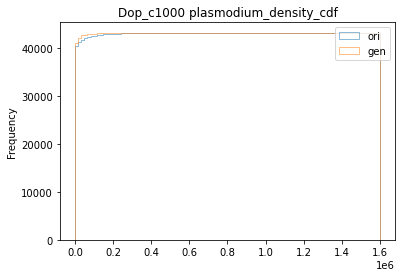

K-S test result: [0.236      0.01764234]


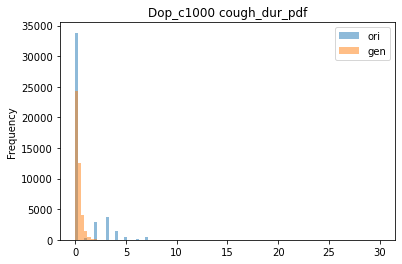

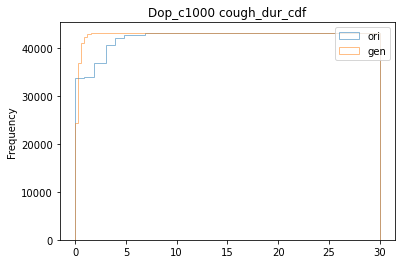

K-S test result: [5.77000000e-01 3.28243565e-12]


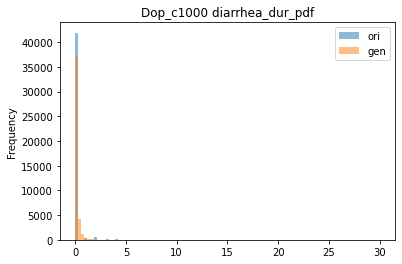

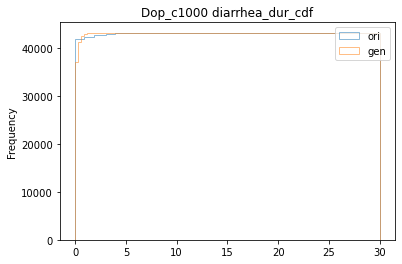

K-S test result: [9.00000000e-01 3.76237239e-37]


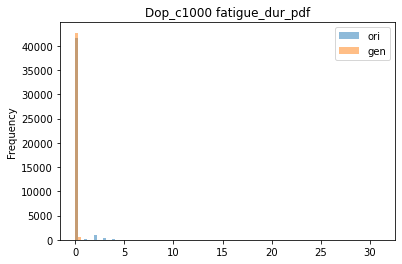

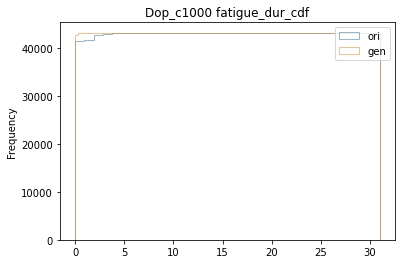

K-S test result: [6.41000000e-01 1.33040464e-14]


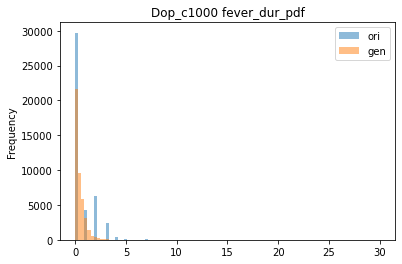

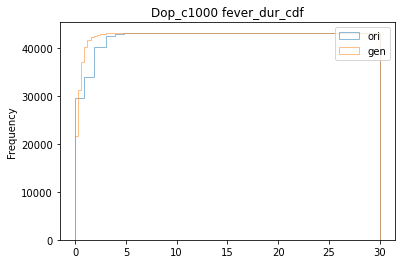

K-S test result: [5.24000000e-01 1.75283324e-07]


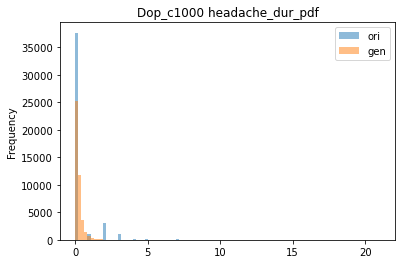

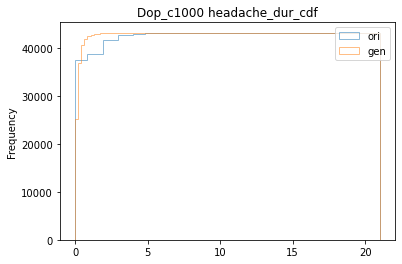

K-S test result: [8.09000000e-01 1.14343517e-28]


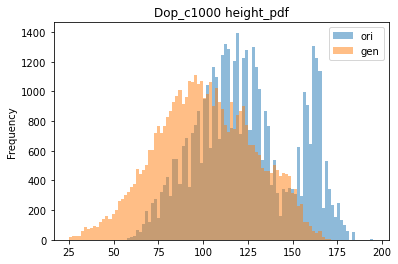

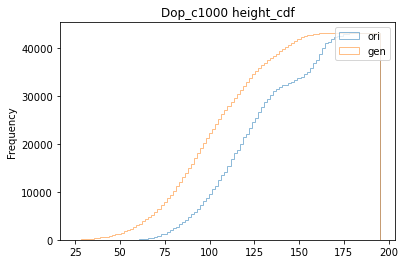

K-S test result: [0.322      0.00122329]


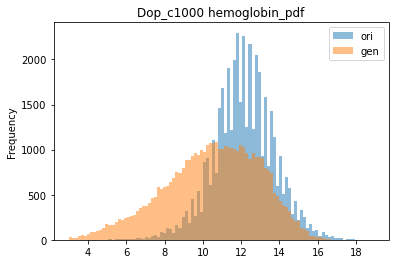

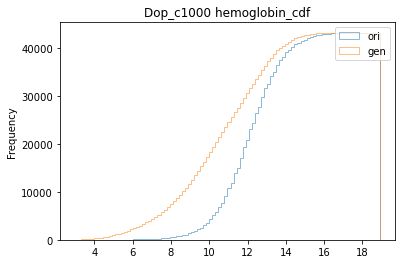

K-S test result: [0.375      0.00040112]


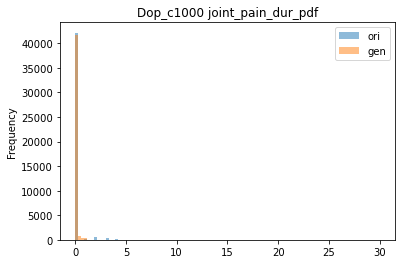

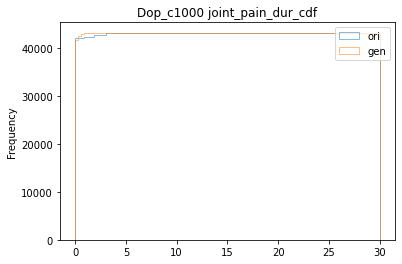

K-S test result: [8.0800000e-01 4.3466301e-27]


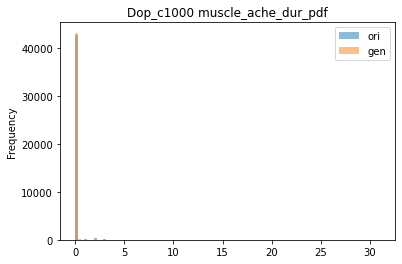

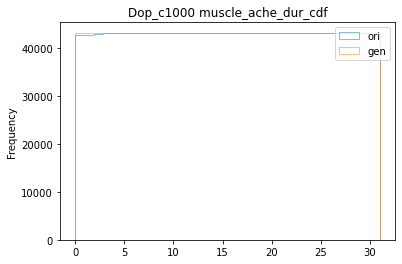

K-S test result: [0.347      0.00244975]


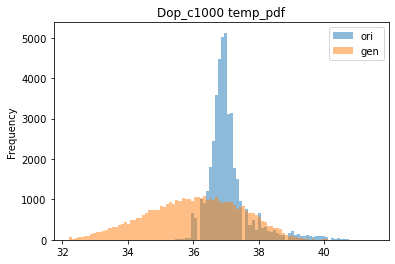

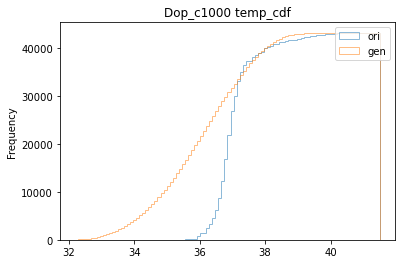

K-S test result: [5.47000000e-01 1.11562183e-09]


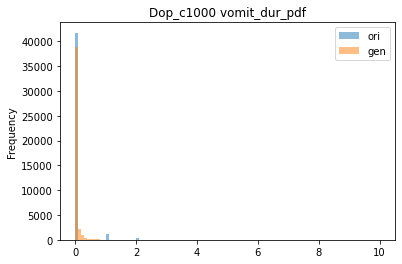

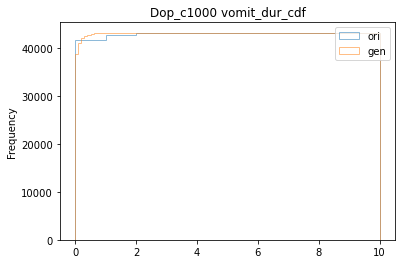

K-S test result: [4.43000000e-01 5.54974966e-07]


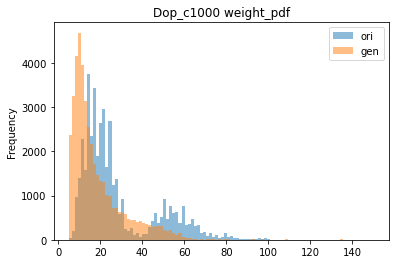

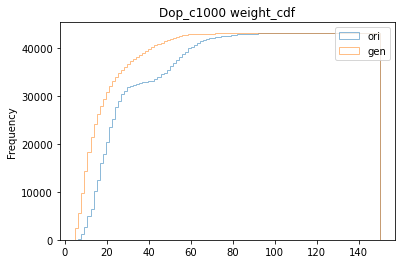

K-S test result: [4.03000000e-01 4.19976405e-05]


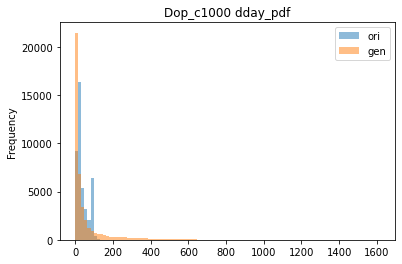

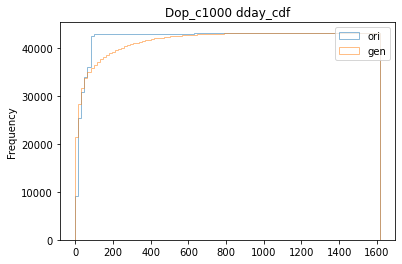

K-S test result: [0.336      0.00126517]


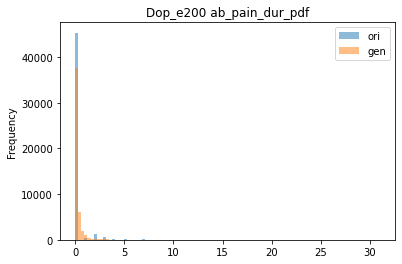

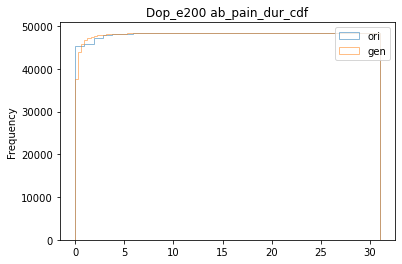

K-S test result: [6.74000000e-01 1.14577995e-18]


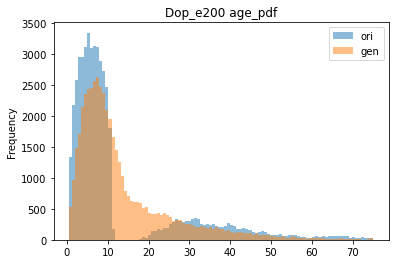

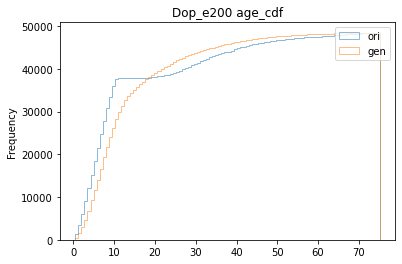

K-S test result: [0.238      0.03052166]


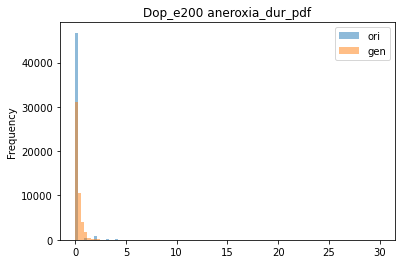

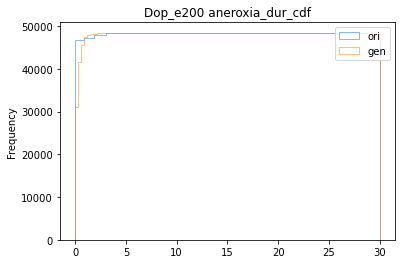

K-S test result: [8.09000000e-01 4.47320384e-29]


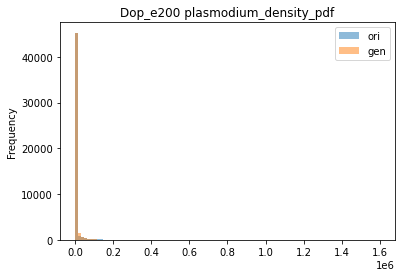

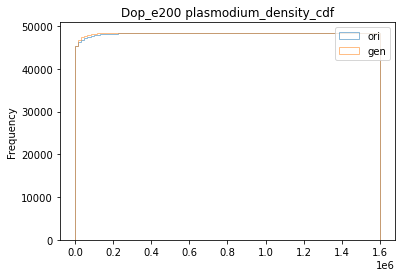

K-S test result: [4.27000000e-01 2.08398178e-06]


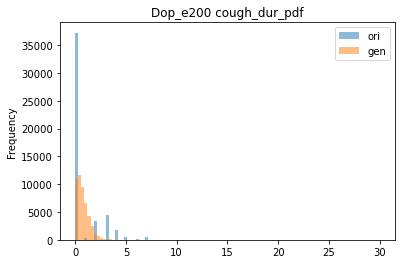

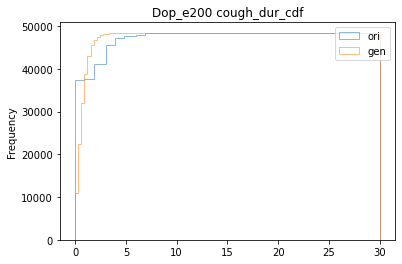

K-S test result: [7.50000000e-01 5.14803054e-24]


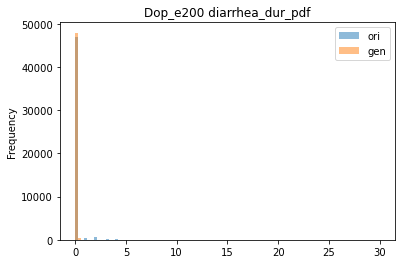

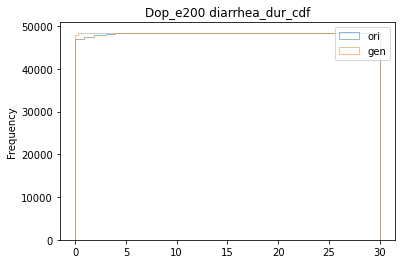

K-S test result: [0.257      0.00545698]


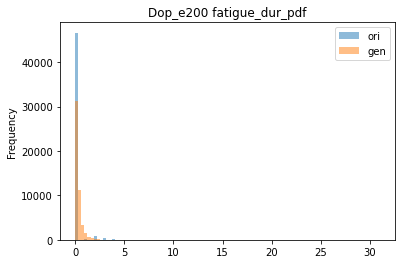

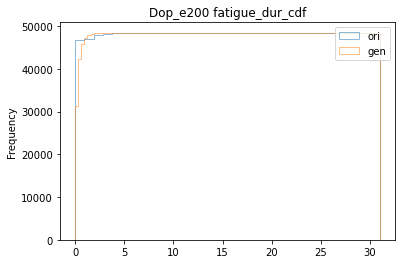

K-S test result: [7.590000e-01 2.172899e-25]


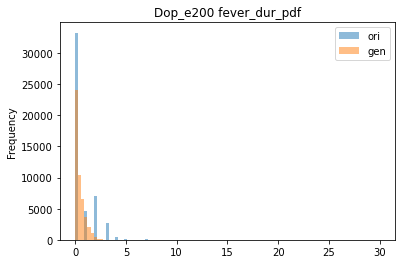

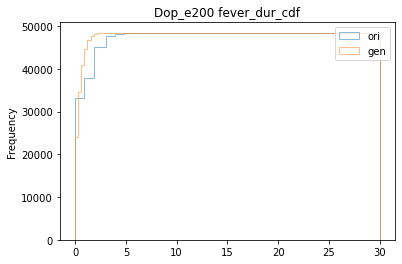

K-S test result: [4.45000000e-01 1.99852015e-06]


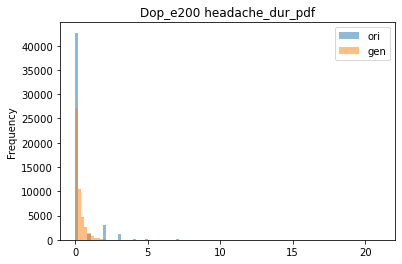

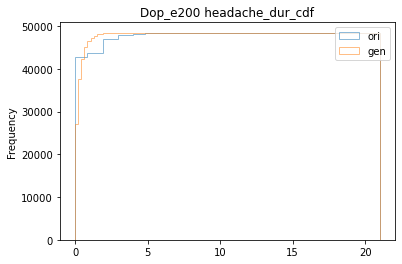

K-S test result: [7.8900000e-01 1.3610936e-27]


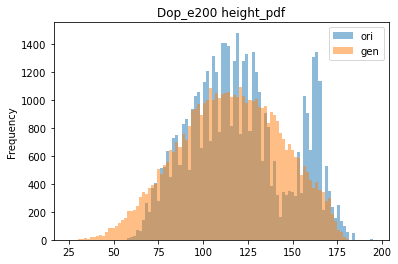

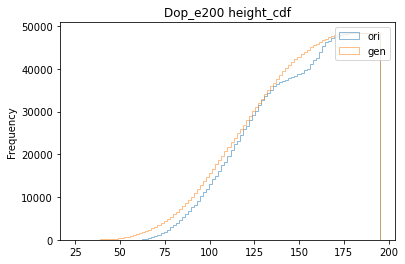

K-S test result: [0.125      0.48123416]


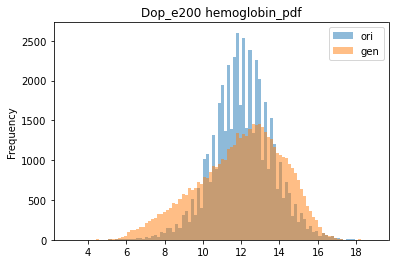

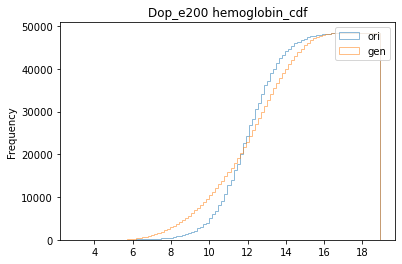

K-S test result: [0.181      0.11646873]


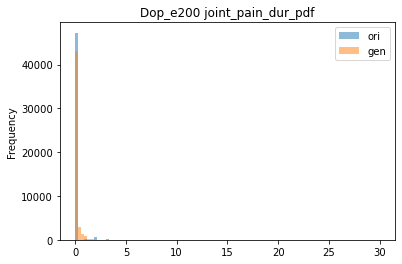

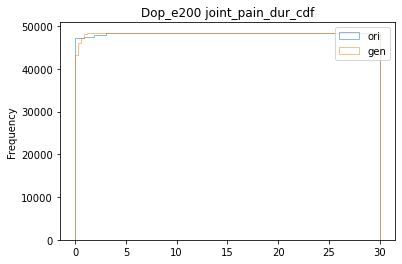

K-S test result: [4.24000000e-01 1.80235903e-06]


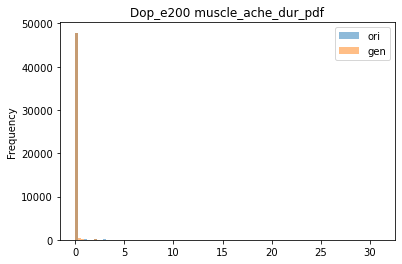

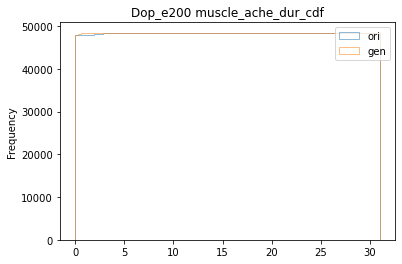

K-S test result: [0.198     0.0897212]


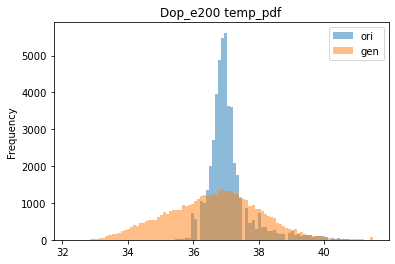

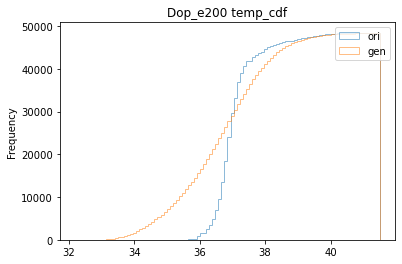

K-S test result: [3.65000000e-01 1.14409645e-05]


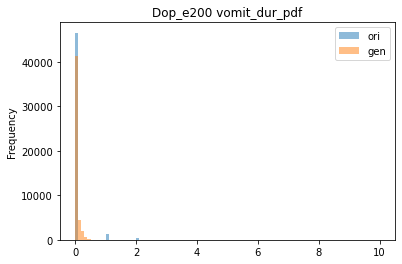

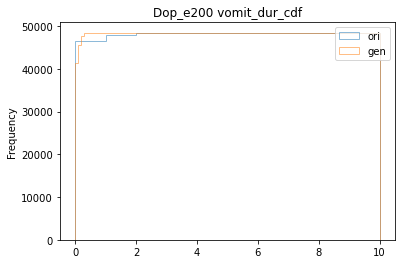

K-S test result: [4.64000000e-01 1.22941967e-07]


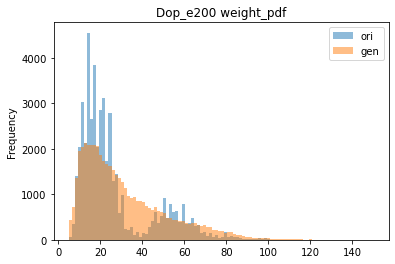

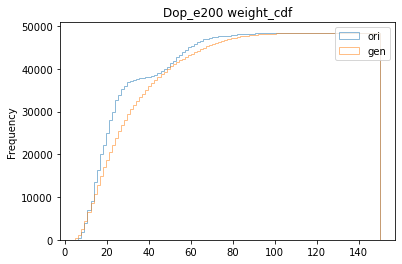

K-S test result: [0.226      0.10262789]


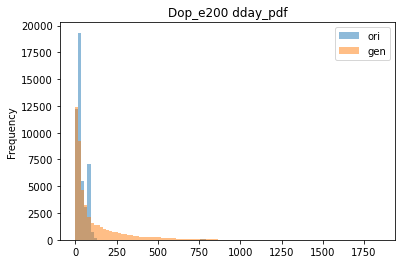

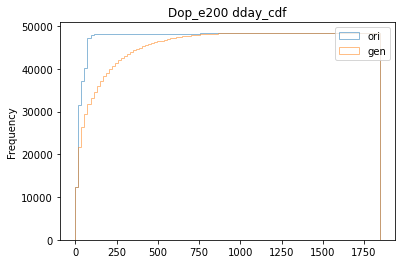

K-S test result: [3.31000000e-01 2.60685543e-04]


In [9]:
#Implement with all synthetic data and the corresponding real data.
for i in range(n):
    key = syn_keys[i]
    p_series = Histogram_KSTest(synthetic_num_dic[key][0],synthetic_num_dic[key][1],syn_name = key)
    if i == 0:
        p_df = pd.DataFrame(p_series,columns = [key])
    else:
        p_df = pd.concat([p_df,pd.DataFrame(p_series,columns = [key])],axis=1,sort = False)

### <u> Results cont. </u>

Table with p values of the Kolmogrov-Smirnov Test for each column, comparing the distribution of the original and the generated dataset. The closer the p values are to 1, the more similar the distribution of a column is between the original and the generated data.

In [10]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)
display('Kolmogrov-Smirnov Test p value table',p_df)

'Kolmogrov-Smirnov Test p value table'

Dop_c1000  Dop_e200
ab_pain_dur         0.0016933 0.0000000
age                 0.0061161 0.0305217
aneroxia_dur        0.0000000 0.0000000
plasmodium_density  0.0176423 0.0000021
cough_dur           0.0000000 0.0000000
diarrhea_dur        0.0000000 0.0054570
fatigue_dur         0.0000000 0.0000000
fever_dur           0.0000002 0.0000020
headache_dur        0.0000000 0.0000000
height              0.0012233 0.4812342
hemoglobin          0.0004011 0.1164687
joint_pain_dur      0.0000000 0.0000018
muscle_ache_dur     0.0024498 0.0897212
temp                0.0000000 0.0000114
vomit_dur           0.0000006 0.0000001
weight              0.0000420 0.1026279
dday                0.0012652 0.0002607

### <u> Conclusions </u>

<a id = "cat_link" Here ></a>

## <font color=#472F91> 1.2 Categorical variables distribution comparison </font>

### <u> Method description </u>

For categorical columns, the empirical distribution of each variable for all categorical columns is calculated for the synthetic dataset and the original dataset.
A dot plot compares the empirical distribution of each variable for the original data set on the x axis and for the synthetic dataset on the y axis, giving a visual perception of the similarity in diversity and distribution. The closer the dot to the y=x line, the higher the fidelity.
<br>To quantifiy this, the MSE (mean squared error) between the empirical distribution for the original and synthetic dataset is calculated for each variable and averaged.
<br><b>The lower the averaged MSE, the higher the fidelity.</b>

### <u> Results </u>

This table displays the probability distributions for each unique variable for each categorical column. The values are plotted on the scatter plot below with generated values on the x axis which are compared to the original values on the y axis. The MSE between the generated and the original probability distributions is supplied below.

In [11]:
#Implement with all synthetic data and the corresponding real data.
d_array = np.zeros(n)
df_cat_dict = {}
for i in range(n):
    key = syn_keys[i]
    distance, df_cat = Scatter_Distance(synthetic_cat_dic[key][0],synthetic_cat_dic[key][1],syn_name = key)
    df_cat_dict[key] = df_cat
    d_array[i] = distance
distance_series= pd.Series(d_array,index = syn_keys)
display('categorical_column-averaged MSE of probability distributions of original and generated data', distance_series)

Dop_c1000 gen probability  \
complicated_malaria_no                             True                  0.0387210   
complicated_malaria_not_assessed                   True                  0.9607707   
complicated_malaria_yes                            True                  0.0005083   
febrile_no                                         True                  0.7827373   
febrile_yes                                        True                  0.2172627   
ITN_no                                             True                  0.0006931   
ITN_not_applicable                                 True                  0.0319287   
ITN_yes                                            True                  0.9673782   
malaria_no                                         True                  0.9614407   
malaria_yes                                        True                  0.0385593   
malaria_parasite_blood_smear_indicated_but_not_... True                  0.0000000   
malaria_parasite_blood_smear_negative_/_lamp_ne... True                  0.5406155   
malaria_parasite_blood_smear_negative_/_lamp_no... True                  0.2485676   
malaria_parasite_blood_smear_negative_/_lamp_po... True                  0.0300804   
malaria_parasite_blood_smear_not_indicated         True                  0.0574346   
malaria_parasite_blood_smear_positive_/_no_malaria True                  0.0085944   
malaria_parasite_symptomatic_malaria               True                  0.1147075   
malaria_treatment_artmether-lumefantrine_for_un... True                  0.0371269   
malaria_treatment_no_malaria_medications_given     True                  0.9627114   
malaria_treatment_quinine_for_uncomplicated_mal... True                  0.0000231   
malaria_treatment_quinine_for_uncomplicated_mal... True                  0.0000231   
malaria_treatment_quinine_or_artesunate_for_com... True                  0.0001155   
plasmodium_gametocytes_no                          True                  0.9969966   
plasmodium_gametocytes_yes                         True                  0.0030034   
plasmodium_lamp_negative                           True                  0.3477960   
plasmodium_lamp_no_result                          True                  0.6358239   
plasmodium_lamp_positive                           True                  0.0163802   
visit_type_enrollment                              True                  0.0314897   
visit_type_scheduled_visit                         True                  0.6227474   
visit_type_unscheduled_visit                       True                  0.3457629   

                                                         Dop_c1000 ori probability  
complicated_malaria_no                             True                  0.1220322  
complicated_malaria_not_assessed                   True                  0.8762160  
complicated_malaria_yes                            True                  0.0017519  
febrile_no                                         True                  0.6865829  
febrile_yes                                        True                  0.3134171  
ITN_no                                             True                  0.0017312  
ITN_not_applicable                                 True                  0.0277617  
ITN_yes                                            True                  0.9705070  
malaria_no                                         True                  0.8762160  
malaria_yes                                        True                  0.1237840  
malaria_parasite_blood_smear_indicated_but_not_... True                  0.0000412  
malaria_parasite_blood_smear_negative_/_lamp_ne... True                  0.3664262  
malaria_parasite_blood_smear_negative_/_lamp_no... True                  0.2301525  
malaria_parasite_blood_smear_negative_/_lamp_po... True                  0.0934872  
malaria_parasite_blood_smear_not_indicated         True                  0.1218673  
malaria_parasite_blood_smear_p

Dop_e200 gen probability  \
complicated_malaria_no                             True                 0.0175323   
complicated_malaria_not_assessed                   True                 0.9824677   
complicated_malaria_yes                            True                 0.0000000   
febrile_no                                         True                 0.7753433   
febrile_yes                                        True                 0.2246567   
ITN_no                                             True                 0.0000000   
ITN_not_applicable                                 True                 0.0278369   
ITN_yes                                            True                 0.9721631   
malaria_no                                         True                 0.9810635   
malaria_yes                                        True                 0.0189365   
malaria_parasite_blood_smear_indicated_but_not_... True                 0.0000000   
malaria_parasite_blood_smear_negative_/_lamp_ne... True                 0.5722457   
malaria_parasite_blood_smear_negative_/_lamp_no... True                 0.3058751   
malaria_parasite_blood_smear_negative_/_lamp_po... True                 0.0124935   
malaria_parasite_blood_smear_not_indicated         True                 0.0159628   
malaria_parasite_blood_smear_positive_/_no_malaria True                 0.0012390   
malaria_parasite_symptomatic_malaria               True                 0.0921838   
malaria_treatment_artmether-lumefantrine_for_un... True                 0.0193908   
malaria_treatment_no_malaria_medications_given     True                 0.9806092   
malaria_treatment_quinine_for_uncomplicated_mal... True                 0.0000000   
malaria_treatment_quinine_for_uncomplicated_mal... True                 0.0000000   
malaria_treatment_quinine_or_artesunate_for_com... True                 0.0000000   
plasmodium_gametocytes_no                          True                 1.0000000   
plasmodium_gametocytes_yes                         True                 0.0000000   
plasmodium_lamp_negative                           True                 0.3163036   
plasmodium_lamp_no_result                          True                 0.6774393   
plasmodium_lamp_positive                           True                 0.0062571   
visit_type_enrollment                              True                 0.0278162   
visit_type_scheduled_visit                         True                 0.6254208   
visit_type_unscheduled_visit                       True                 0.3467630   

                                                         Dop_e200 ori probability  
complicated_malaria_no                             True                 0.1220322  
complicated_malaria_not_assessed                   True                 0.8762160  
complicated_malaria_yes                            True                 0.0017519  
febrile_no                                         True                 0.6865829  
febrile_yes                                        True                 0.3134171  
ITN_no                                             True                 0.0017312  
ITN_not_applicable                                 True                 0.0277617  
ITN_yes                                            True                 0.9705070  
malaria_no                                         True                 0.8762160  
malaria_yes                                        True                 0.1237840  
malaria_parasite_blood_smear_indicated_but_not_... True                 0.0000412  
malaria_parasite_blood_smear_negative_/_lamp_ne... True                 0.3664262  
malaria_parasite_blood_smear_negative_/_lamp_no... True                 0.2301525  
malaria_parasite_blood_smear_negative_/_lamp_po... True                 0.0934872  
malaria_parasite_blood_smear_not_indicated         True                 0.1218673  
malaria_parasite_blood_smear_positive_/_no_malaria True                 0.064

'categorical_column-averaged MSE of probability distributions of original and generated data'

Dop_c1000   0.0041583
Dop_e200    0.0062306
dtype: float64

### <u> Conclusions </u>

<a id = "pearsons_link" Here ></a>

## <font color=#472F91> 1.3 Pearson's Correlation Coefficient Comparison </font>

### <u> Method description </u>

To confirm dependencies between variables within columns are maintained, Pearson’s R correlation coefficient is calculated between categorical (all?) columns within the original and synthetic data. The R value measures the strength of association between 2 columns. Ideally, the real and synthetic data should have the same R value for a given pair of columns.
<br>To compare the datasets, we use two measurements. Firstly, the MSE (mean standard error) is calculated between each correlation coefficient.
<br><b>The lower the MSE, the higher the fidelity.</b>
<br>Secondly, the SRA (Synthetic Ranking Agreement) for each column is calculated. Here, the R correlation coefficients for the remaining columns are ranked for both the synthetic and the original data and compared.
<br><b>The closer SRA is to 1 the higher the fidelity.</b>

### <u> Results </u>

Two tables are displayed with the R correlation coefficient between all columns, for the original and for the generated data. For high level of correlation with an R > 0.5, the cell is coloured yellow. The fourth table displays the MSEs between the R correlation coefficients between the original and the generated data, displaying the result for each column.

In [12]:
n = len(syn_keys)
MSE_array = np.zeros(n)
for i in range(n):
    key = syn_keys[i]
    df_ori = synthetic_data_dic[key][0]
    df_gen = synthetic_data_dic[key][1]
    r_table_ori = r_corr_test(df_ori)
    r_table_gen = r_corr_test(df_gen)

    display(key+' '+'generated r table',r_table_gen.style.applymap(color_threshold_yellow))
    display(key+' '+'real r table',r_table_ori.style.applymap(color_threshold_yellow))
    sra = CorrelationSRA(r_table_ori, r_table_gen, ColumnWise=True)
    if i==0:
        sra_df = pd.DataFrame(sra, columns=[key])
    else:
        sra_df = pd.concat([sra_df,pd.DataFrame(sra, columns=[key])], axis = 1, sort = False)
    #display(key+' '+'SRA',sra)
    MSE_df, MSE_score = MSE(r_table_gen,r_table_ori)
    display(key+' '+'Table showing MSE of correlation coefficient R between columns', MSE_df)
    MSE_array[i] = MSE_score
MSE_series = pd.Series(MSE_array,index = syn_keys)

'Dop_c1000 generated r table'

'Dop_c1000 real r table'

'Dop_c1000 Table showing MSE of correlation coefficient R between columns'

id  ab_pain_dur  \
id                                                 0.0000000    0.0001723   
ab_pain_dur                                        0.0001723    0.0000000   
age                                                0.0000007    0.0258320   
aneroxia_dur                                       0.0018437    0.0142856   
plasmodium_density                                 0.0000006    0.0000617   
cough_dur                                          0.0061170    0.0002657   
diarrhea_dur                                       0.0005367    0.0109931   
fatigue_dur                                        0.0000325    0.0220609   
fever_dur                                          0.0258721    0.0023821   
headache_dur                                       0.0001843    0.0039858   
height                                             0.0035455    0.0076584   
hemoglobin                                         0.0041719    0.0011672   
joint_pain_dur                                     0.0007308    0.0207740   
muscle_ache_dur                                    0.0023662    0.0005290   
temp                                               0.0050043    0.0000025   
vomit_dur                                          0.0099089    0.0095518   
weight                                             0.0125450    0.0193039   
complicated_malaria_no                             0.0076966    0.0004982   
complicated_malaria_not_assessed                   0.0076187    0.0004955   
complicated_malaria_yes                            0.0000023    0.0000009   
febrile_no                                         0.0051362    0.0042890   
febrile_yes                                        0.0051362    0.0042890   
ITN_no                                             0.0000500    0.0000564   
ITN_not_applicable                                 0.0014531    0.0000278   
ITN_yes                                            0.0015094    0.0000106   
malaria_no                                         0.0075809    0.0005192   
malaria_yes                                        0.0075809    0.0005192   
malaria_parasite_blood_smear_indicated_but_not_... 0.0000064    0.0000015   
malaria_parasite_blood_smear_negative_/_lamp_ne... 0.0095165    0.0067166   
malaria_parasite_blood_smear_negative_/_lamp_no... 0.0035760    0.0013941   
malaria_parasite_blood_smear_negative_/_lamp_po... 0.0068075    0.0022546   
malaria_parasite_blood_smear_not_indicated         0.0002273    0.0189455   
malaria_parasite_blood_smear_positive_/_no_malaria 0.0087377    0.0021624   
malaria_parasite_symptomatic_malaria               0.0072170    0.0000186   
malaria_treatment_artmether-lumefantrine_for_un... 0.0065850    0.0004123   
malaria_treatment_no_malaria_medications_given     0.0064140    0.0004224   
malaria_treatment_quinine_for_uncomplicated_mal... 0.0000299    0.0001447   
malaria_treatment_quinine_for_uncomplicated_mal... 0.0000931    0.0000277   
malaria_treatment_quinine_or_artesunate_for_com... 0.0000902    0.0000023   
plasmodium_gametocytes_no                          0.0021038    0.0001661   
plasmodium_gametocytes_yes                         0.0021038    0.0001661   
plasmodium_lamp_negative                           0.0110509    0.0086381   
plasmodium_lamp_no_result                          0.0024386    0.0133438   
plasmodium_lamp_positive                           0.0080280    0.0020021   
visit_type_enrollment                              0.0014859    0.0000293   
visit_type_scheduled_visit                         0.0013380    0.0248476   
visit_type_unscheduled_visit                       0.0024733    0.0256743   
dday                                               0.0044166    0.0007669   

                                                         age  aneroxia_dur  \
id                                                 0.0000007     0.0018437   
ab_pain_dur                                        0.0258320     0.0142856   
age                                               

'Dop_e200 generated r table'

'Dop_e200 real r table'

'Dop_e200 Table showing MSE of correlation coefficient R between columns'

id  ab_pain_dur  \
id                                                 0.0000000    0.0031257   
ab_pain_dur                                        0.0031257    0.0000000   
age                                                0.0000255    0.0162186   
aneroxia_dur                                       0.0005321    0.0007749   
plasmodium_density                                 0.0005490    0.0028559   
cough_dur                                          0.0102500    0.0146677   
diarrhea_dur                                       0.0117818    0.0000694   
fatigue_dur                                        0.0002194    0.0983835   
fever_dur                                          0.0141199    0.0257886   
headache_dur                                       0.0002048    0.0173471   
height                                             0.0081867    0.0070534   
hemoglobin                                         0.0063934    0.0012674   
joint_pain_dur                                     0.0000724    0.0097901   
muscle_ache_dur                                    0.0002783    0.2598490   
temp                                               0.0021169    0.0110619   
vomit_dur                                          0.0021664    0.0202970   
weight                                             0.0134813    0.0001756   
complicated_malaria_no                             0.0106571    0.0013502   
complicated_malaria_not_assessed                   0.0103299    0.0013043   
complicated_malaria_yes                            0.0000603    0.0000110   
febrile_no                                         0.0081977    0.0031592   
febrile_yes                                        0.0081977    0.0031592   
ITN_no                                             0.0000697    0.0000192   
ITN_not_applicable                                 0.0014788    0.0000124   
ITN_yes                                            0.0015492    0.0000032   
malaria_no                                         0.0106800    0.0013554   
malaria_yes                                        0.0106800    0.0013554   
malaria_parasite_blood_smear_indicated_but_not_... 0.0000064    0.0000015   
malaria_parasite_blood_smear_negative_/_lamp_ne... 0.0131400    0.0079054   
malaria_parasite_blood_smear_negative_/_lamp_no... 0.0029402    0.0004068   
malaria_parasite_blood_smear_negative_/_lamp_po... 0.0078620    0.0015212   
malaria_parasite_blood_smear_not_indicated         0.0001363    0.0205926   
malaria_parasite_blood_smear_positive_/_no_malaria 0.0083010    0.0021548   
malaria_parasite_symptomatic_malaria               0.0090666    0.0009061   
malaria_treatment_artmether-lumefantrine_for_un... 0.0105435    0.0014223   
malaria_treatment_no_malaria_medications_given     0.0103033    0.0014275   
malaria_treatment_quinine_for_uncomplicated_mal... 0.0000023    0.0001300   
malaria_treatment_quinine_for_uncomplicated_mal... 0.0000939    0.0000160   
malaria_treatment_quinine_or_artesunate_for_com... 0.0000603    0.0000110   
plasmodium_gametocytes_no                          0.0017527    0.0001807   
plasmodium_gametocytes_yes                         0.0017527    0.0001807   
plasmodium_lamp_negative                           0.0126683    0.0109950   
plasmodium_lamp_no_result                          0.0032551    0.0159562   
plasmodium_lamp_positive                           0.0077574    0.0015213   
visit_type_enrollment                              0.0014790    0.0000127   
visit_type_scheduled_visit                         0.0035914    0.0243246   
visit_type_unscheduled_visit                       0.0054016    0.0250678   
dday                                               0.0065165    0.0047066   

                                                         age  aneroxia_dur  \
id                                                 0.0000255     0.0005321   
ab_pain_dur                                        0.0162186     0.0007749   
age                                               

### <u> Results cont. </u>

The averaged MSE for all columns between the orignal and generated data is presented below.
<br>The table below the MSE includes the SRA (Synthetic Ranking Accuracy) for each column where it's R correlation coefficients with the remaining columns are ranked for both the synthetic and the original data and compared.

In [14]:
display('averaged MSE values of R for each version of synthetic data', MSE_series)

'averaged MSE values of R for each version of synthetic data'

Dop_c1000   0.0220217
Dop_e200    0.0270887
dtype: float64

In [15]:
display('SRA: Ranking each column and comparing between original and generated data', sra_df)

'SRA: Ranking each column and comparing between original and generated data'

Dop_c1000  Dop_e200
id                                                  0.5753546 0.3351064
ab_pain_dur                                         0.7047872 0.4281915
age                                                 0.6560284 0.5292553
aneroxia_dur                                        0.6613475 0.3945035
plasmodium_density                                  0.5487589 0.4547872
cough_dur                                           0.7065603 0.4574468
diarrhea_dur                                        0.6196809 0.3679078
fatigue_dur                                         0.6533688 0.4884752
fever_dur                                           0.6773050 0.5115248
headache_dur                                        0.5806738 0.3129433
height                                              0.7136525 0.5381206
hemoglobin                                          0.7508865 0.5709220
joint_pain_dur                                      0.6356383 0.4521277
muscle_ache_dur                                     0.7101064 0.4618794
temp                                                0.7065603 0.5372340
vomit_dur                                           0.5035461 0.3102837
weight                                              0.6728723 0.4920213
complicated_malaria_no                              0.7570922 0.5868794
complicated_malaria_not_assessed                    0.7322695 0.6028369
complicated_malaria_yes                             0.5097518 0.0124113
febrile_no                                          0.7615248 0.4991135
febrile_yes                                         0.7615248 0.4991135
ITN_no                                              0.4512411 0.0079787
ITN_not_applicable                                  0.7597518 0.5815603
ITN_yes                                             0.7251773 0.6125887
malaria_no                                          0.7437943 0.5975177
malaria_yes                                         0.7437943 0.5984043
malaria_parasite_blood_smear_indicated_but_not_...  0.0079787 0.0079787
malaria_parasite_blood_smear_negative_/_lamp_ne...  0.8023050 0.5434397
malaria_parasite_blood_smear_negative_/_lamp_no...  0.7792553 0.5017730
malaria_parasite_blood_smear_negative_/_lamp_po...  0.7535461 0.4893617
malaria_parasite_blood_smear_not_indicated          0.7615248 0.5221631
malaria_parasite_blood_smear_positive_/_no_malaria  0.6312057 0.4512411
malaria_parasite_symptomatic_malaria                0.7739362 0.5948582
malaria_treatment_artmether-lumefantrine_for_un...  0.7836879 0.5700355
malaria_treatment_no_malaria_medications_given      0.7553191 0.5984043
malaria_treatment_quinine_for_uncomplicated_mal...  0.4911348 0.0132979
malaria_treatment_quinine_for_uncomplicated_mal...  0.7482270 0.0132979
malaria_treatment_quinine_or_artesunate_for_com...  0.5771277 0.0124113
plasmodium_gametocytes_no                           0.5203901 0.0079787
plasmodium_gametocytes_yes                          0.5203901 0.0079787
plasmodium_lamp_negative                            0.7721631 0.5328014
plasmodium_lamp_no_result                           0.7748227 0.5212766
plasmodium_lamp_positive                            0.6586879 0.5124113
visit_type_enrollment                               0.7641844 0.5815603
visit_type_scheduled_visit                          0.7508865 0.5026596
visit_type_unscheduled_visit                        0.7721631 0.5062057
dday                                                0.5877660 0.3652482
AVERAGE                                             0.6668698 0.4186983

### <u> Conclusions </u>

<hr>

# <font color=#0275D8> 2. Fidelity Evaluation </font>

<a id = "tSNE_PCA_link" Here ></a>

## <font color=#472F91> 2.1 tSNE and PCA plots comparison </font>

### <u> Method description </u>

tSNE and PCA plots reduce a multi-dimensional dataset (i.e with multiple columns) into a 2-dimensional visualisation. 
<br>A machine-learning algorithm groups similar variables and although we cannot interpret the coordinates attributed, we can compare if the groupings made are similar in the original and synthetic data by overlaying the plots.
<br><b>The higher the overlay, the higher the fidelity.</b>

### <u> Results </u>

tSNE and PCA plot overlays for original and generated data

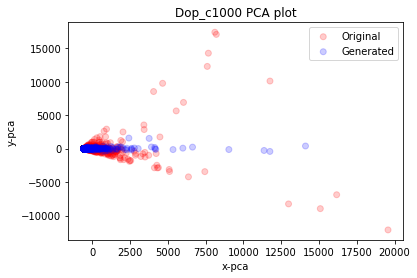

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.053s...
[t-SNE] Computed neighbors for 2000 samples in 1.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 8.455562
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.810143
[t-SNE] KL divergence after 300 iterations: 1.118311


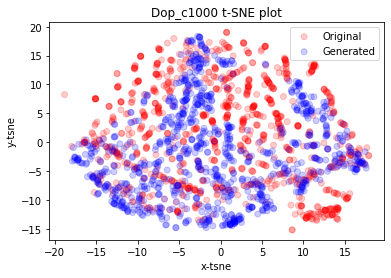

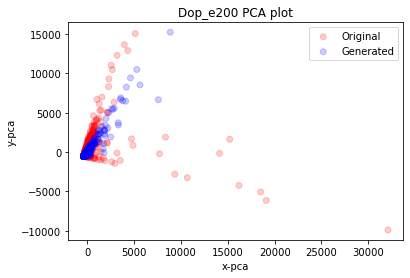

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.068s...
[t-SNE] Computed neighbors for 2000 samples in 0.978s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 12.413535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.480392
[t-SNE] KL divergence after 300 iterations: 1.138107


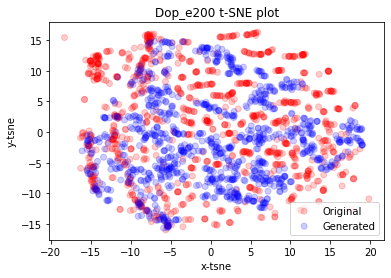

In [16]:
for i in range(n):
    key = syn_keys[i]
    dp_pca_results, dp_pca_hat_results = visualization(synthetic_array_dic[key][0], synthetic_array_dic[key][1], 'pca',syn_name = key)
    dp_tsne_results, dp_tsne_hat_results = visualization(synthetic_array_dic[key][0], synthetic_array_dic[key][1], 'tsne',syn_name = key)

### <u> Conclusions </u>

<a id = "discrim_link" Here ></a>

## <font color=#472F91> 2.2 Discriminative model performance </font>

### <u> Model Description </u>
For a quantitative measure of similarity, a post-hoc time-series classification model is trained (by optimizing a multi-layer GRU) to distinguish between sequences from the original and generated datasets.
First, each original sequence is labeled '1', and each generated sequence is labeled '0'.
<br>Then, an off-the-shelf (RNN) classifier is trained to distinguish between the two classes as a standard supervised task.
<br>An accuracy score on the held-out test set gives a quantitative assessment of fidelity.
<br><b>An accuracy score similar to the expected accuracy score for an untrained discriminative model indicates the discriminator cannot tell the difference between both datasets.</b>

### <u> Results </u>

A table with the report is displayed together with the expected accuracy and the obtained accuracy. The more similar these two values are, the better the fidelity of the generated data towards the original data.

In [17]:
for i in range(n):
    key = syn_keys[i]

    # train discriminative model
    train_data, val_data, test_data, train_labels, val_labels, test_labels = train_val_test_split(ori_data=synthetic_array_num_dic[key][0], gen_data=synthetic_array_num_dic[key][0])

    input_dim = np.asarray(synthetic_array_num_dic[key][0]).shape[2]
    d_model = discriminative_model(input_size=[None, input_dim], hidden_dim=64)

    # CHANGE TO MORE EPOCHS
    history_d_model = d_model.fit(train_data, train_labels, batch_size=128, epochs=100, validation_data=(val_data, val_labels), verbose=0)

    d_model.evaluate(test_data, test_labels)

    # get prediction from test data
    test_pred = np.round(d_model.predict(test_data))

    report = classification_report(test_labels, test_pred, digits=5, output_dict=True)
    report = pd.DataFrame(report).transpose()
    print(key)
    print(report)

    exp_acc = np.sum(test_labels)/np.shape(test_labels)[0]
    print('Expected accuracy for an untrained discriminative model = ', str(exp_acc))
    print('Final accuracy of trained discriminative model = ', str(accuracy_score(test_labels, test_pred)))

13/13 [==============================] - 0s 9ms/step - loss: 0.7041
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Dop_c1000
              precision    recall  f1-score     support
0.0           0.4395062 1.0000000 0.6106346 178.0000000
1.0           0.0000000 0.0

### <u> Conclusions </u>

<a id = "auto_link" Here ></a>

## <font color=#472F91> 2.3 Autocorrelation comparison </font>

### <u> Model description </u>

To confirm the variance in numerical values/counts over time are maintained, autocorrelation graphs are plotted for both datasets and overlayed.
<br><b>The higher the overlay, the higher the fidelity.</b>

### <u> Results </u>

The following plots show overlays of the autocorrelation plots for original and generated data for number of visits per week and number of positive malaria diagnosis per week.

In [18]:
acf_dict = {}
for i in range(n):
    key = syn_keys[i]
    ori_auto_5above, table_freq_visit_week_ori = auto_prep(synthetic_auto_dic[key][0])
    gen_auto, table_freq_visit_week_gen = auto_prep(synthetic_auto_dic[key][1])
    acf_df_week_visits, autocorrelation_plot_week_visits = autocorrelation(ori_auto_5above, gen_auto, table_freq_visit_week_ori,table_freq_visit_week_gen, key, " plot for number of visits per week")
    acf_dict[key] = acf_df_week_visits
    display(autocorrelation_plot_week_visits)


In [22]:
acf_malaria_dict = {}
for i in range(n):
    key = syn_keys[i]
    malaria_ori=subset(synthetic_auto_dic[key][0],'Malaria diagnosis [EUPATH_0000090]')
    malaria_gen=subset(synthetic_auto_dic[key][1],'Malaria diagnosis [EUPATH_0000090]')
    malaria_ori, table_freq_malaria_ori = auto_prep(malaria_ori)
    malaria_gen, table_freq_malaria_gen = auto_prep(malaria_gen)
    acf_df_malaria, autocorrelation_plot_malaria=autocorrelation(malaria_ori, malaria_gen, table_freq_malaria_ori, table_freq_malaria_gen, key, " plot for malaria diagnosis per week")
    acf_malaria_dict[key] = acf_df_malaria
    display(autocorrelation_plot_malaria)

### <u> Conclusions </u>

<hr>

# <font color=#0275D8> 3. Usefulness evaluation </font>

<a id = "pred_link" Here ></a>

## <font color=#472F91> 3.1 Predictive model performance comparison </font>

### <u> Method description </u>

A series of commonly used regression based predictive models (Linear Regression, Linear Support Vector Regression, Random Forests Regression, Logistic Regression, Decision tree Regression and K-Nearest Neighbors Regression) are applied to the test samples and trained on the train samples for both the original and the synthetic data (Test-on-real, Train-on-real & Test-on-synthetic, Train-on-synthetic). The model attempts to predict a variable within a column based on the remaining columns.  
    The MSE (mean squared error) is calculated between the predicted value resulting from the predictive model and the test sample and averaged (MSE_1), resulting in MSE_1's for each column, for each predictive model, for the original and synthetic datasets (visualised in the first scatter plot below).  
    <br>To compare the datasets, the MSE between the MSE_1's of the original and the synthetic dataset is calculated (MSE_2), resulting in MSE_2's for each predictive model.
    <br>The average of MSE_1's for all columns is calculated between the datasets (MSE_3), resulting in MSE_3 for each predictive model, for the original and the synthetic dataset (visualised in the second scatter plot below).
    <br> To compare datasets, the MSE between the MSE_3's for the original and the synthetic data is calculated (MSE_4).
    <br><b>A low MSE_2/MSE_4 indicates the synthetic and original dataset behaved similarly in the predictive models.</b>
    <br>Because users to do not have access to the original data, synthetic data should behave similarly to the original data when trained using any algorithms.  
    To assess this, we use SRA (Synthetic Ranking Agreement) which focuses on measuring how similar algorithms perform when trained with original and synthetic data. The MSE_1's (MSE for each column) for each predictive model are ranked and the ranking  of the original and synthetic data are compared, resulting in SRA_1 for each column.
    <br>Similarly, the MSE_3's (column-averaged MSE) for each predictive model can be ranked, giving an SRA_2 measure.
    <br><b>SRA values close to 1 indicate the synthetic and original dataset behave similarly when trained on different predictive models.</b>

### <u> Results </u>

The following table shows the MSE_1's (i.e the prediction scores) obtained for each column for each predictive model in the original and in the generated data. 
<br>The original log(MSE_1) and the generated log(MSE_1) are used as coordinates for the scatter plot below. We use the log(MSE) (instead of the MSE) to simplify visualisation.
<br>The MSE's between the original and the generated data (MSE_2) can be seen below the scatter plots for each model. The averaged MSE between all models is also displayed.

In [28]:
# MSE_1
colmse_t = Comparison_Table(synthetic_num_dic, aver=False, models=['LR', 'KNR1', 'DTR'])
display(colmse_t)

Dop_c1000                                                       \
             ori                                                        
     ab_pain_dur        age aneroxia_dur plasmodium_density cough_dur   
LR     0.8346325 58.4943264    0.2082993 1179265353.4587944 2.0622139   
KNR1   0.9585886 37.0712078    0.2614839 1287985807.1755977 2.3801220   
DTR    1.4935697 42.1811319    0.5395713 2212095423.3855729 3.8755977   

                                                                  ...  \
                                                                  ...   
     diarrhea_dur fatigue_dur fever_dur headache_dur      height  ...   
LR      0.1938639   0.2026397 0.7765975    0.5544120 139.1798919  ...   
KNR1    0.2322077   0.2661105 1.0301797    0.6947436  70.5507316  ...   
DTR     0.4331410   0.5751855 1.2477329    0.9553998  48.8637424  ...   

      Dop_e200                                                     \
           gen                                                      
     fever_dur headache_dur      height hemoglobin joint_pain_dur   
LR   0.1650141    0.0517346  76.5647878  0.4179249      0.0275294   
KNR1 0.1783294    0.0673353 221.7517854  1.3538305      0.0266001   
DTR  0.0800724    0.0234030  70.0175278  0.5560702      0.0045283   

                                                                   
                                                                   
     muscle_ache_dur      temp vomit_dur     weight          dday  
LR         0.0077893 0.3587880 0.0039526 91.4751361 16186.1231954  
KNR1       0.0075309 0.8810847 0.0029089 79.8575312  9187.8852637  
DTR        0.0001363 0.2867984 0.0009390 20.7677562  3387.6739170  

[3 rows x 68 columns]

In [29]:
plot_colmse(colmse_t)

In [30]:
# MSE_2
avg_modelmse_t = get_avg_mse_per_model(colmse_t)
print("Column-averaged MSE between real and generated data for each model")
display(avg_modelmse_t)

Column-averaged MSE between real and generated data for each model


Dop_c1000                   Dop_e200
LR    64407369432976016.0000000 123596836877775632.0000000
KNR1  84492739348480384.0000000 160787768908835808.0000000
DTR  279474856661822752.0000000 361574081430164480.0000000

In [31]:
print("mean across models of the column-averaged-MSE ")
get_mean_avg_modelmse(avg_modelmse_t)

mean across models of the column-averaged-MSE 


Dop_c1000                   Dop_e200
mean model-averaged mse 142791655147759696.0000000 215319562405591968.0000000

### <u> Results cont. </u>
The following table shows the column-averaged MSE's from MSE_1 values (MSE_3) for each predictive model for the original and synthetic data. 
<br>The original and generated MSE values are used as coordinates for the scatter plot below. 
<br> The MSE between the original and generated values (MSE_4) is shown below.

In [32]:
# MSE_3
com_t = Comparison_Table(synthetic_num_dic, aver=True, models=['LR', 'KNR1'])
print('column-averaged MSE for each model for the original and synthetic data')
display(com_t)

column-averaged MSE for each model for the original and synthetic data


Dop_c1000                         Dop_e200                 
              ori MSE         gen MSE          ori MSE          gen MSE
LR   62230244.8113031 9087131.5267046 75851049.1659993 12528240.8174827
KNR1 70290999.0352876 6537375.6027013 83571811.9621445  8660671.0274313

In [33]:
Scatter_TSTS_TRTR(com_t)

In [34]:
# MSE_4
print("model-averaged MSE of (column-averaged MSE between original and generated data)")
get_origen_mse(com_t)

model-averaged MSE of (column-averaged MSE between original and generated data)


Dop_c1000                 Dop_e200
avg ori gen MSE 3444357495181847.0000000 4810728546641717.0000000

### <u> Results cont. </u>
This presents the SRA for each column (SRA_1), where the MSE_1's for each predictive model were ranked and compared between original and synthetic data. This is repeated for all the columns.
<br> The second table (SRA_2) displays the SRA value that was calculated using the column-averaged  MSE's (MSE_3) ranking the predictive models which is compared between the original and synthetic data. 

In [35]:
# SRA_1
sra_col_t = get_SRA_per_col(colmse_t, num_cols)
print("SRA: Ranking the MSE of each model compared between real and original data")
pd.set_option('display.max_columns', 500)
display(sra_col_t)

SRA: Ranking the MSE of each model compared between real and original data


Dop_c1000                                                      \
    ab_pain_dur       age aneroxia_dur plasmodium_density cough_dur   
SRA   0.3333333 0.6666667    0.3333333          0.0000000 1.0000000   

                                                                          \
    diarrhea_dur fatigue_dur fever_dur headache_dur    height hemoglobin   
SRA    0.3333333   0.3333333 0.3333333    0.0000000 0.6666667  0.6666667   

                                                                            \
    joint_pain_dur muscle_ache_dur      temp vomit_dur    weight      dday   
SRA      0.0000000       0.0000000 0.3333333 0.0000000 1.0000000 0.0000000   

       Dop_e200                                                      \
    ab_pain_dur       age aneroxia_dur plasmodium_density cough_dur   
SRA   0.3333333 0.3333333    0.0000000          0.0000000 0.3333333   

                                                                          \
    diarrhea_dur fatigue_dur fever_dur headache_dur    height hemoglobin   
SRA    0.3333333   0.0000000 0.3333333    0.3333333 0.6666667  0.6666667   

                                                                            
    joint_pain_dur muscle_ache_dur      temp vomit_dur    weight      dday  
SRA      0.0000000       0.0000000 0.3333333 0.0000000 0.6666667 0.0000000

In [36]:
# SRA_2
sra_E = SRA_TSTS_TRTR(com_t)
display(sra_E)

'SRA: Ranking MSE for each model between real and generated data'

Dop_e200    0.0000000
Dop_c1000   0.0000000
dtype: float64

### <u> Conclusions </u>

<a id = "tpred_link" Here ></a>

## <font color=#472F91> 3.2 Next-step predictive model performance comparison </font>

### <u> Method description </u>
This method has a similar principal to the previous method with the difference that the predictive model attempts to predict all variables for next time-step entry
    based on the values for previous time-stamps.
    <br>Here the predictive model provided by Tensorflow Keras API returns a test metric and a test loss for each column.
    <br>To compare between datasets, two parameters are determined.
    <br>Firstly, the MSE of the test loss/test metric is calculated between the real and the synthetic data for each column.
    <br>Secondly, the SRA is calculated, ranking the test metric/test loss of each column, and then comparing the rank for the synthetic and the original data.
    <br><b>A low MSE and an SRA close to 1 indicates the predictive model behaves similarly in attempting to predict the next time-step in both datasets.</b>

### <u> Results </u>
The following table gives a report on the test metric and test loss for each column when trained with with the number of epochs and windows described below.
<br> The scatter plots display the test metric or the test loss for the original data (x axis) and generated data (y axis) for each predicted column.
<br> Finally, the MSE of the test metric and the test loss for all columns is calculated between the original and the generated data. In parallel, the SRA is also calculated, where the test metric or test loss for each column is ranked and compared between the original and the generated data.

In [37]:
# CHANGE TO ALL COLUMNS and HAVE MORE EPOCHS
TxTx_tpred = TxTx_tpred_multiple(synthetic_array_num_dic, y_cols=[0,1,2], y_cols_name=num_cols[:3], windows=65, epochs=1, show_training=False)
TxTx_tpred


Predictive model running for column  ab_pain_dur  with window length  65
Getting results for column  ab_pain_dur  with window length  65
696/696 [==============================] - 3s 4ms/step - loss: 0.0331 - last_time_step_mae: 0.0036

Predictive model running for column  age  with window length  65
Getting results for column  age  with window length  65
696/696 [==============================] - 3s 4ms/step - loss: 2.3242 - last_time_step_mae: 0.3371

Predictive model running for column  aneroxia_dur  with window length  65
Getting results for column  aneroxia_dur  with window length  65
696/696 [==============================] - 3s 4ms/step - loss: 0.0215 - last_time_step_mae: 0.0056

Predictive model running for column  ab_pain_dur  with window length  65
Getting results for column  ab_pain_dur  with window length  65
696/696 [==============================] - 3s 4ms/step - loss: 0.0095 - last_time_step_mae: 0.0018

Predictive model running for column  age  with window length  65


Dop_c1000                                                 \
          y_col test_loss_trtr test_metric_trtr test_loss_tsts   
0   ab_pain_dur      0.0331189        0.0035956      0.0095462   
1           age      2.3242018        0.3370559      1.1007942   
2  aneroxia_dur      0.0215073        0.0056317      0.0098410   

                        Dop_e200                                  \
  test_metric_tsts         y_col test_loss_trtr test_metric_trtr   
0        0.0017711   ab_pain_dur      0.0299189        0.0028767   
1        0.1374569           age      2.2152290        0.3011469   
2        0.0011302  aneroxia_dur      0.0215979        0.0009649   

                                   
  test_loss_tsts test_metric_tsts  
0      0.0545361        0.0119923  
1      2.3301523        0.3519718  
2      0.0451334        0.0078096

In [38]:
plot_TxTx_tpred(TxTx_tpred)

In [39]:
TxTx_tpred_mse = get_TxTx_mse(TxTx_tpred)
print("numerical_column-averaged MSE between TRTR and TSTS ")
TxTx_tpred_mse

numerical_column-averaged MSE between TRTR and TSTS 


Dop_c1000              Dop_e200            
              test_loss metric_loss test_loss metric_loss
trtr tsts MSE 0.4991393   0.0132878 0.0047891   0.0009044

In [40]:
TxTx_tpred_sra = get_TxTx_SRA(TxTx_tpred)
print("SRA: Ranking numerical columns between real and synthetic data")
TxTx_tpred_sra

SRA: Ranking numerical columns between real and synthetic data


Dop_c1000              Dop_e200            
    test_loss metric_loss test_loss metric_loss
SRA 0.6666667   0.6666667 1.0000000   1.0000000

<hr>

# <font color=#0275D8> CSV exports </font>

In [28]:
# define version of data to be saved
# since some functions concatenate all versions together in one df while others produce separate ones
version = 'DoppelGANger_0903'

##1.1 Histograms
##combine ori_num and gen_num
ori_num.columns=[str(col) + '_ori' for col in ori_num.columns]
gen_num.columns=[str(col) + '_gen' for col in gen_num.columns]
hist_df=pd.concat([ori_num, gen_num], axis=1, sort=False)
#hist_df.to_csv('csv_results_0903/distribution_num_coordinates.csv')

##1.2 Categorical plots
df_cat_1 = df_cat_dict[version]
# df_cat_1.to_csv('csv_results_0903/distribution_cat_coordinates.csv')

##2.1 tSNE and PCA plots
dp_pca_np = np.concatenate([dp_pca_results, dp_pca_hat_results], axis = 1)
dp_pca_df = pd.DataFrame(dp_pca_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
dp_pca_df.to_csv('csv_results_0903/pca_coordinates.csv', index=False)
dp_tsne_np = np.concatenate([dp_tsne_results, dp_tsne_hat_results], axis = 1)
dp_tsne_df = pd.DataFrame(dp_tsne_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
dp_tsne_df.to_csv('csv_results_0903/tsne_coordinates.csv', index=False)

##2.3 Autocorrelation

acf_df_week_visits_1 = acf_dict[version]
acf_df_week_visits_1.to_csv('csv_results_0903/autocorrelation_visitweeks.csv')
acf_df_malaria_1 = acf_malaria_dict[version]
acf_df_malaria_1.to_csv('csv_results_0903/autocorrelation_malaria.csv')

##3.1 Predictive model
##still need to change colmse_t here to be able to export
log_colmse_t = np.log(colmse_t)
#log_colmse_t.to_csv('csv_results/MSE_1_coordinates_figure1.csv')
#com_t.to_csv('csv_results/MSE_3_coordinates_figure2.csv') #manually remove first row before seeding

##3.2 Time Predictive model
TxTx_tpred.to_csv('csv_results_0903/t_Predictive_coordinates.csv') #manually remove top row and first column b4 seeding